* Reference to [Three Ways of Storing and Accessing Lots of Images in Python](https://realpython.com/storing-images-in-python/)

In [2]:
import os 

import h5py 
import wget 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
from scipy.io import loadmat
from scipy.ndimage import gaussian_filter

In [3]:
labels = loadmat(r"../Dataset/mall_dataset/mall_gt.mat")['frame'][0]
print(labels.shape)

(2000,)


## Get an image as numpy array 

../Dataset/mall_dataset/frames/seq_000001.jpg


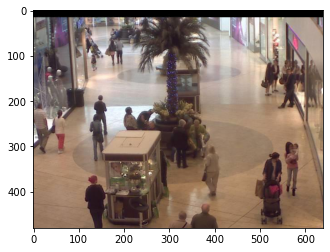

In [11]:
i = 0
img_path = f"../Dataset/mall_dataset/frames/seq_{str(i+1).zfill(6)}.jpg"
print(img_path)

image_np = np.array(Image.open(img_path), dtype=np.float32) / 255. 
plt.imshow(image_np)
plt.show()

image = np.transpose(image_np, (2, 0, 1)) # (h, w, c) -> (c, h, w)

## Generate a density map by applying a Gaussian filter 

In [5]:
print(labels[0][0][0][0].shape) # (n_persons, xy-coordinate)
print(labels[1][0][0][0].shape)
print(labels[2][0][0][0].shape)

(29, 2)
(30, 2)
(35, 2)


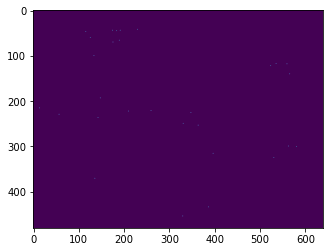

In [8]:
label_info = labels[0][0][0][0] 
image_shape = image.shape[1:] # (h, w)

# create an empty density map 
label = np.zeros(image_shape, dtype=np.float32)


# loop over objects positions and marked them with 100 on a label
# note: *_ because some datasets contain more info except x, y coordinates (like x,y,z)
for x, y, *_ in label_info: 
    if y < image_shape[0] and x < image_shape[1]: 
        # the point being inside the image.
        label[int(y)][int(x)] = 100

plt.imshow(label)
plt.show()

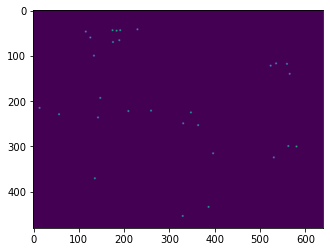

In [9]:
# apply a convolution with a Gaussian kernel
label = gaussian_filter(label, sigma=(1,1), order=0)

plt.imshow(label)
plt.show()

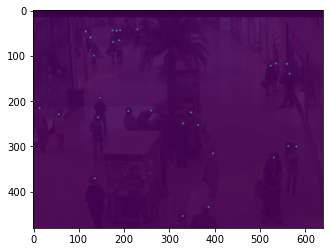

In [13]:
plt.imshow(image_np)
plt.imshow(label, alpha=0.9)

plt.show()